In [1]:
#Importamos las bibliotecas que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data/dataset_turnos.csv')
data.sample(3)



,Unnamed: 0,appointmentfromtime,DayName,priordayholiday,nextdayholiday,day,hour,outofschedule,appointmentstate,age,daysbeforereserved,gender,healthcoverage,firsttime,emailvalid,endofmonth
496,2028,18/1/2021 10:20,Monday,0,0,18,10,False,1,1,33,F,Con OS,1,0,0
24236,109788,1/7/2022 11:00,Friday,0,0,1,11,True,1,1,0,F,Con OS,0,1,0
13495,62307,16/11/2021 11:00,Tuesday,0,0,16,11,False,1,1,21,F,Con OS,0,1,0


In [2]:

x_columnas = ['endofmonth','emailvalid','DayName','priordayholiday','nextdayholiday','day','hour','age','daysbeforereserved','outofschedule','firsttime','gender','healthcoverage']
y_columnas = ['appointmentstate']
data_modelo =  pd.concat([data[y_columnas],data[x_columnas]], axis = 1)
data_modelo

,appointmentstate,endofmonth,emailvalid,DayName,priordayholiday,nextdayholiday,day,hour,age,daysbeforereserved,outofschedule,firsttime,gender,healthcoverage
0,1,0,0,Monday,0,0,4,8,1,0,False,1,F,Con OS
1,0,0,0,Monday,0,0,4,8,1,0,False,0,F,Con OS
2,1,0,1,Monday,0,0,4,9,11,18,False,1,F,Con OS
3,0,0,0,Monday,0,0,4,9,1,19,False,1,F,Con OS
4,1,0,1,Monday,0,0,4,10,6,0,True,1,F,Con OS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24935,1,0,1,Monday,0,0,18,16,4,0,True,0,F,Con OS
24936,0,0,1,Monday,0,0,18,17,42,16,False,1,F,Con OS
24937,1,0,1,Monday,0,0,18,18,5,35,False,1,F,Con OS
24938,1,0,1,Monday,0,0,18,18,1,20,False,0,M,Con OS


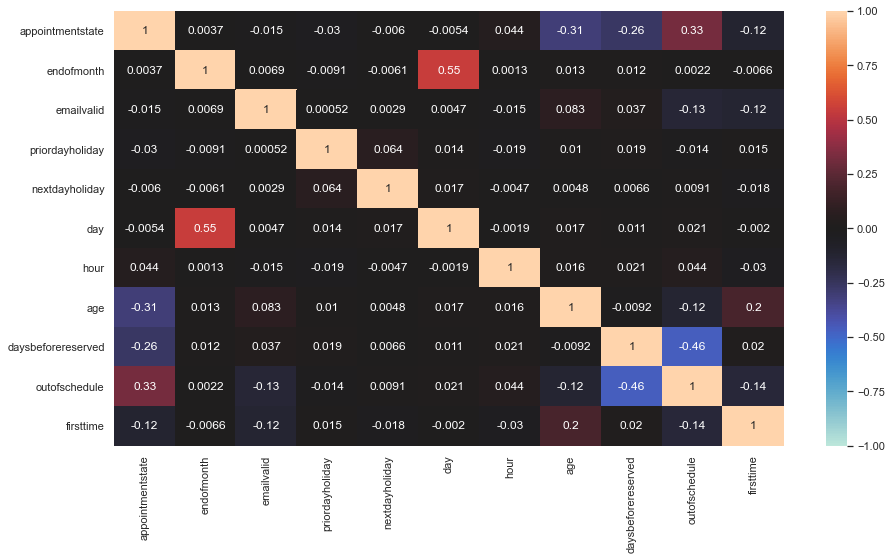

In [3]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_modelo.corr(), vmin=-1, vmax=1, center=0, annot=True);

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


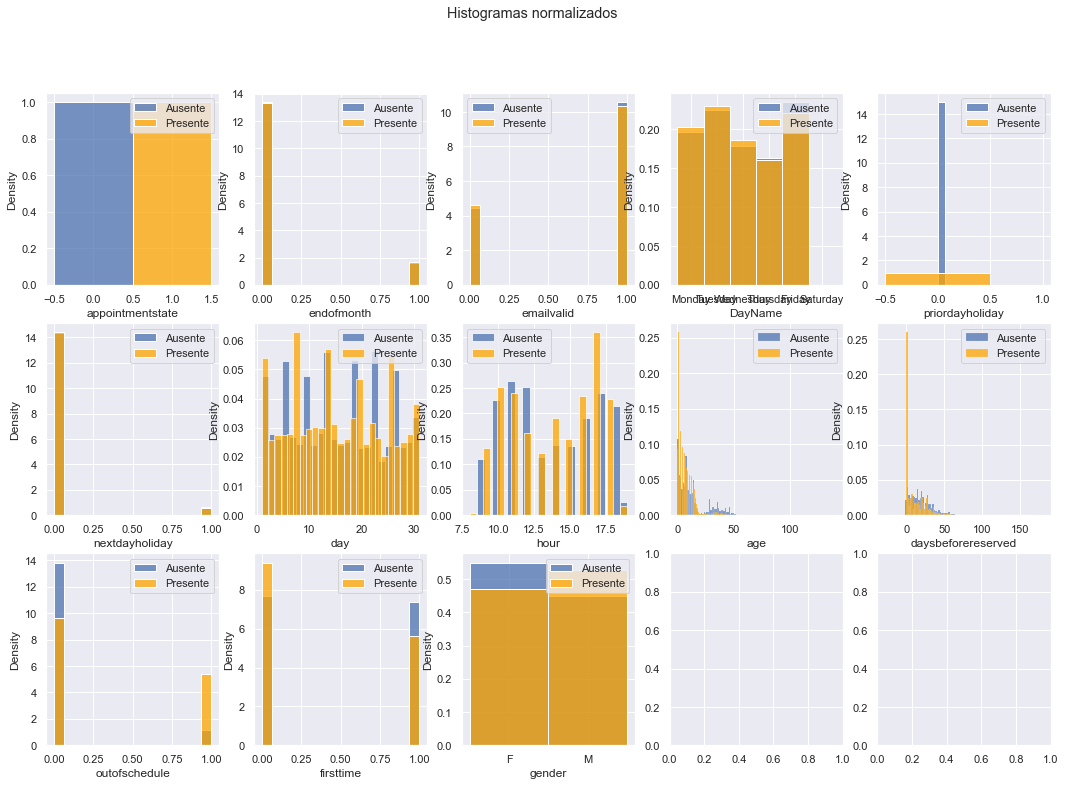

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(data_modelo.columns[:-1], axes.flatten()):
    sns.histplot(data = data_modelo.loc[data_modelo['appointmentstate']==0, c].dropna(), stat = 'density', ax = ax, kde = False )
    sns.histplot(data = data_modelo.loc[data_modelo['appointmentstate']==1, c].dropna(), stat = 'density', kde=False, ax=ax, color = 'orange')
    ax.legend(['Ausente', 'Presente'])

In [5]:
data_dummies=pd.get_dummies(data_modelo[['DayName','gender','healthcoverage']], drop_first = True)
data_dummies

,DayName_Monday,DayName_Saturday,DayName_Thursday,DayName_Tuesday,DayName_Wednesday,gender_M,healthcoverage_Sin OS
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
24935,1,0,0,0,0,0,0
24936,1,0,0,0,0,0,0
24937,1,0,0,0,0,0,0
24938,1,0,0,0,0,1,0


In [6]:

data_modelo = pd.concat([data[['endofmonth','day','hour','emailvalid','appointmentstate','priordayholiday','nextdayholiday','age','daysbeforereserved','outofschedule','firsttime']],data_dummies], axis = 1)
data_modelo = data_modelo.reset_index(drop=True)
data_modelo.head(3)

,endofmonth,day,hour,emailvalid,appointmentstate,priordayholiday,nextdayholiday,age,daysbeforereserved,outofschedule,firsttime,DayName_Monday,DayName_Saturday,DayName_Thursday,DayName_Tuesday,DayName_Wednesday,gender_M,healthcoverage_Sin OS
0,0,4,8,0,1,0,0,1,0,False,1,1,0,0,0,0,0,0
1,0,4,8,0,0,0,0,1,0,False,0,1,0,0,0,0,0,0
2,0,4,9,1,1,0,0,11,18,False,1,1,0,0,0,0,0,0


<AxesSubplot:>

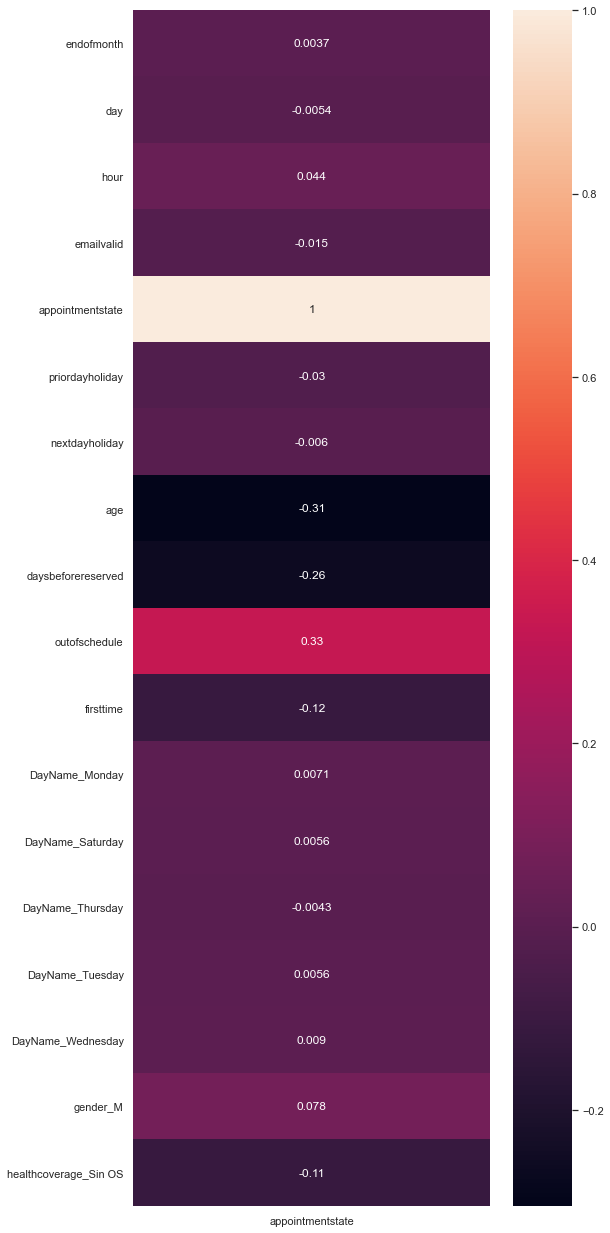

In [7]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
plt.figure(figsize=(8,22))
sns.heatmap(data_modelo.corr()[['appointmentstate']], annot=True)

In [8]:
#Genero mi variable X
X=data_modelo.drop(['appointmentstate'],axis=1)

#Genero la variable y
y = data_modelo[y_columnas].squeeze()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [9]:
y_train.mean(), y_test.mean()

(0.5615610799251537, 0.5615076182838813)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_train, lr.predict(X_train_std))

0.6871959369152633

Text(111.5, 0.5, 'Reales')

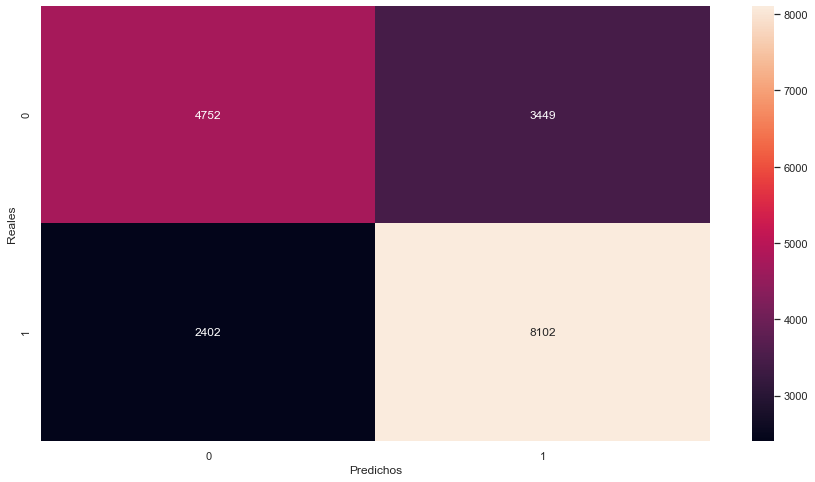

In [13]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [14]:
lr.predict_proba(X_train_std[y_train==0])[:,1]

array([0.638928  , 0.53867724, 0.46514219, ..., 0.56451959, 0.16731488,
       0.50015511])

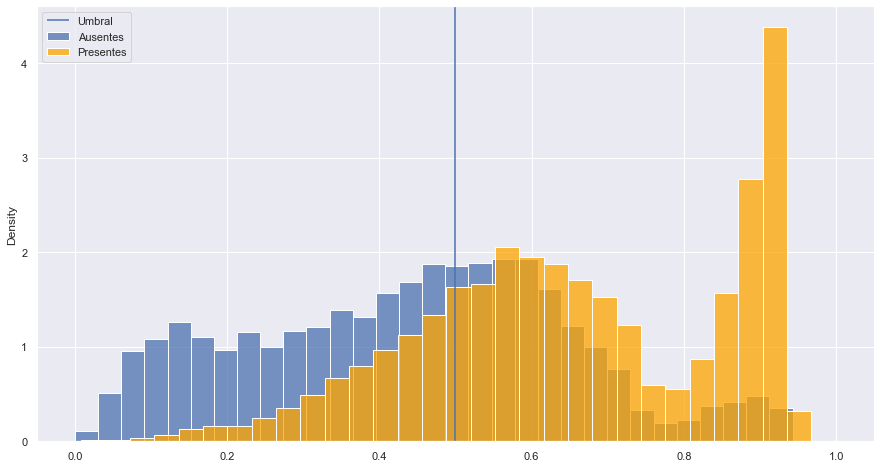

In [15]:
# Histograma de probabilidades
sns.histplot(data = lr.predict_proba(X_train_std[y_train==0])[:,1], stat = 'density')
sns.histplot(data = lr.predict_proba(X_train_std[y_train==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'Ausentes', 'Presentes'])

In [19]:
umbral = 0.7
probs = lr.predict_proba(X_train_std)[:,1]
y_pred_train = probs > umbral

In [20]:
accuracy_score(y_train, y_pred_train)

0.6263031275060145

Text(111.5, 0.5, 'Reales')

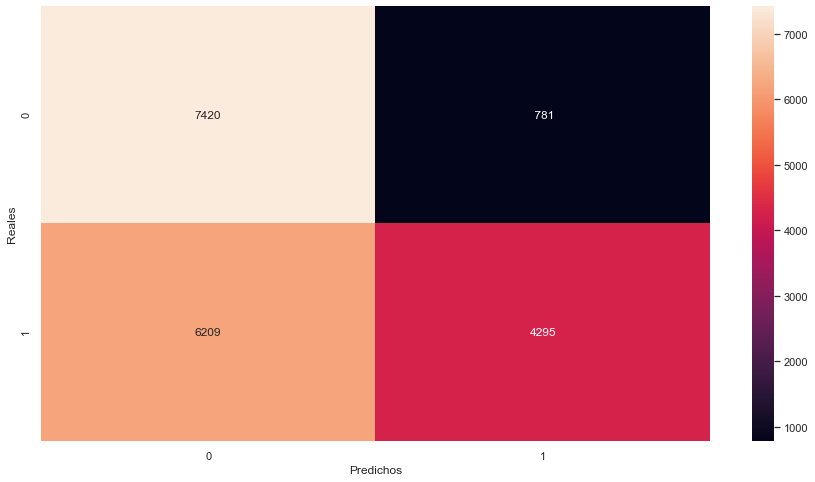

In [21]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')